dict_keys(['ID', 'NR', 'SW', 'INT_DESI', 'SATNO', 'NA', 'TY', 'CL', 'ABC', 'MASS', 'DIAMTR', 'SMA', 'ECC', 'INC', 'RAAN', 'AOP', 'TANO', 'DC', 'RCSFAC', 'RPOP1', 'RPOP2', 'SEED', 'Breakup Epoch', 'Launch Epoch', 'Perigee Altitude', 'Apogee Altitude'])
dict_keys(['ID', 'NR', 'SW', 'INT_DESI', 'SATNO', 'NA', 'TY', 'CL', 'ABC', 'MASS', 'DIAMTR', 'SMA', 'ECC', 'INC', 'RAAN', 'AOP', 'TANO', 'DC', 'RCSFAC', 'RPOP1', 'RPOP2', 'SEED', 'Breakup Epoch', 'Launch Epoch', 'Perigee Altitude', 'Apogee Altitude'])
28 17
{'1982-093A', '1975-118C', '2007-054B', '1967-066G', '1977-092A', '2009-018A', '1991-802A', '1973-040B', '1980-018A', '1991-067A', '1991-803A', '1999-042A', '1975-123C', '2003-024A', '1976-023F', '2015-075B', '1999-005A', '1979-087A', '1979-053C', '2002-040B', '1969-013B', '1968-081E', '2004-015A', '1975-117A', '1979-009A', '2006-018A', '2016-004A', '1966-053J'}
{'1973-040B', '1991-803A', '1979-087A', '1979-053C', '1975-118C', '1999-042A', '1988-018B', '1966-053J', '1977-092A', '1967-0

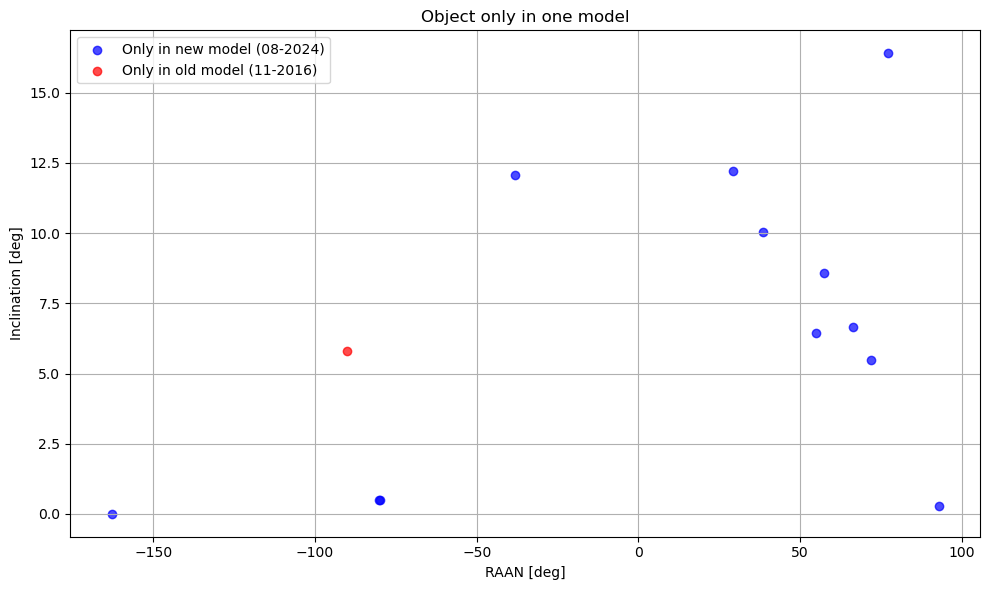

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def compare_files(file1_path: str, file2_path: str):
    data1 = read_breakup_event_file(file1_path)
    data2 = read_breakup_event_file(file2_path)

    int_desi_1 = set(data1["INT_DESI"])
    int_desi_2 = set(data2["INT_DESI"])

    only_in_file1 = int_desi_1 - int_desi_2
    only_in_file2 = int_desi_2 - int_desi_1

    result = []
    for desi in only_in_file1:
        result.append((desi, "only in " + file1_path))
    for desi in only_in_file2:
        result.append((desi, "only in " + file2_path))

    return result


def read_breakup_event_file(filename: str):
    colspecs = [
        (0, 5), (5, 10), (10, 14), (14, 23), (23, 33),
        (33, 37), (37, 42), (42, 48), (48, 54), (54, 62),
        (62, 69), (69, 79), (79, 87), (87, 93), (93, 102),
        (102, 111), (111, 120), (120, 126), (126, 135), (135, 143),
        (143, 147), (147, 154), (154, 177), (177, 204), (204, 225), (225, 252)
    ]

    column_names = [
        "ID", "NR", "SW", "INT_DESI", "SATNO", "NA", "TY", "CL", "ABC", "MASS",
        "DIAMTR", "SMA", "ECC", "INC", "RAAN", "AOP", "TANO", "DC", "RCSFAC", "RPOP1",
        "RPOP2", "SEED", "Breakup Epoch", "Launch Epoch", "Perigee Altitude", "Apogee Altitude"
    ]

    df = pd.read_fwf(filename, colspecs=colspecs, names=column_names, skiprows=1, comment='=')

    # Drop the last row
    df = df.iloc[:-1, :]

    return df.to_dict(orient='list')


data_11_2016 = read_breakup_event_file("populations_11_2016.txt")
data_08_2024 = read_breakup_event_file("populations_08_2024.txt")

print(data_11_2016.keys())
print(data_08_2024.keys())
int_desi_11_2016 = data_11_2016["INT_DESI"]
int_desi_08_2024 = data_08_2024["INT_DESI"]

data_08_2024 = read_breakup_event_file("populations_08_2024.txt")
compare_files("populations_08_2024.txt", "populations_11_2016.txt")


def plot_orbital_differences(file1_path: str, file2_path: str):
    data1 = read_breakup_event_file(file1_path)
    data2 = read_breakup_event_file(file2_path)

    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)

    set1 = set(df1["INT_DESI"])
    set2 = set(df2["INT_DESI"])
    print(len(set1), len(set2))
    print(set1)
    print(set2)

    only_in_1 = set1 - set2
    only_in_2 = set2 - set1

    print(len(only_in_1), len(only_in_2))
    print(only_in_1)
    print(only_in_2)

    df1_unique = df1[df1["INT_DESI"].isin(only_in_1)].copy()
    df2_unique = df2[df2["INT_DESI"].isin(only_in_2)].copy()

    # Konvertiere Spalten zu float
    df1_unique["RAAN"] = pd.to_numeric(df1_unique["RAAN"])
    df1_unique["INC"] = pd.to_numeric(df1_unique["INC"])
    df2_unique["RAAN"] = pd.to_numeric(df2_unique["RAAN"])
    df2_unique["INC"] = pd.to_numeric(df2_unique["INC"])

    df1_unique["RAAN"] = ((df1_unique["RAAN"] + 180) % 360) - 180
    df2_unique["RAAN"] = ((df2_unique["RAAN"] + 180) % 360) - 180

    plt.figure(figsize=(10, 6))
    plt.scatter(df1_unique["RAAN"], df1_unique["INC"], label=f"Only in new model (08-2024)", alpha=0.7, color="blue")
    plt.scatter(df2_unique["RAAN"], df2_unique["INC"], label=f"Only in old model (11-2016)", alpha=0.7, color="red")
    plt.xlabel("RAAN [deg]")
    plt.ylabel("Inclination [deg]")
    plt.title("Object only in one model")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_orbital_differences("populations_08_2024.txt", "populations_11_2016.txt")